# PROJECT TITLE: ESTIMATE THE ANNUAL MEDICAL EXPENDITURE FOR NEW CUSTOMER
# Author: Ian Farai Madhara

In [49]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from urllib.request import urlretrieve
from typing import Optional
%matplotlib inline

## Step 1: Understanding the dataset
For loading data i Created a helper function to load data from repo

In [12]:

def load_dataset(url:str,filename:str="insurance.csv")->None:
    urlretrieve(url, filename) 

#### The dataset for this project is hosted here [Insurance Data](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)

In [17]:
insurance_data_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv"
load_dataset(insurance_data_url)

In [26]:
# Reading csv file
df = pd.read_csv("insurance.csv")

In [28]:
# preview data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
# checking the number of rows  and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 1338 rows and 7 columns


In [29]:
# Checking column names and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Step 2 Summarizing the data

In [30]:
# Looking at summary statistics,This allows for possible inferences like distribution, skewness
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
# Summary for categorical
df['sex'].value_counts() # checking counts for sex

sex
male      676
female    662
Name: count, dtype: int64

In [32]:
# checking number of unique sex
df['sex'].nunique()

2

In [34]:
# checking foe number of smokers
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [36]:
# check for number of unique values
df['smoker'].nunique()

2

In [38]:
# checking for number of regions
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [40]:
# checking for unique values
df['region'].nunique()

4

In [42]:
df.isnull().sum() # Investigate nulls in the data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since there is no column with NaN, we won't have to worry about imputing any column values using different imputation strategies like mean, median, most_frequent or constant

In [80]:
df.duplicated().sum() # check for duplicate
df = df.drop_duplicates() # removing duplicates

## Step 3: Exploratory Analysis and Visualization

#### Correlation

In [81]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex)
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region)
df.region = le.transform(df.region)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Have encoded the categorical variables to numeric form before testing for covariance

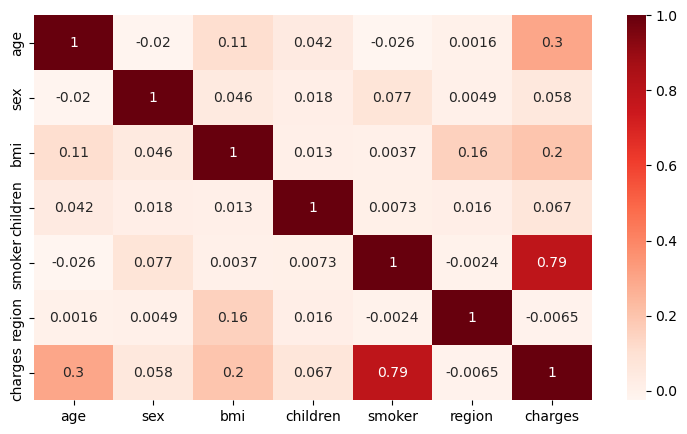

In [87]:
figure, ax = plt.subplots(figsize=(9,5))
corr = df.corr() # return correlation matrix
sns.heatmap(corr,cmap='Reds',annot=True)
plt.show()

We see a strong correlation between smoking and charges, since there is no correlation between charges and region, i will not worry about it in my analysis, though children has a low correlation i will investigate it in detail

#### Body Max Index

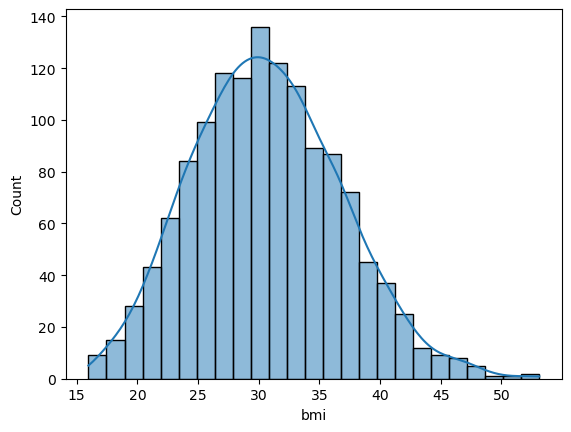

In [50]:
sns.histplot(data=df, x="bmi", kde=True)
plt.show()

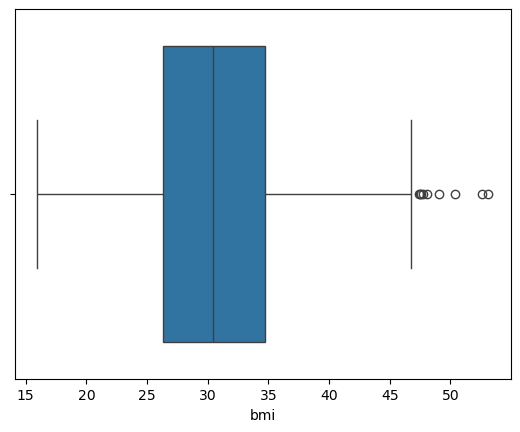

In [52]:
sns.boxplot(x=df["bmi"])
plt.show()

The BMI seems to follow a normal distribution with a mean of around 30, which basically translate to obesity, there seem to be a few outliers toward the right tail of the distribution

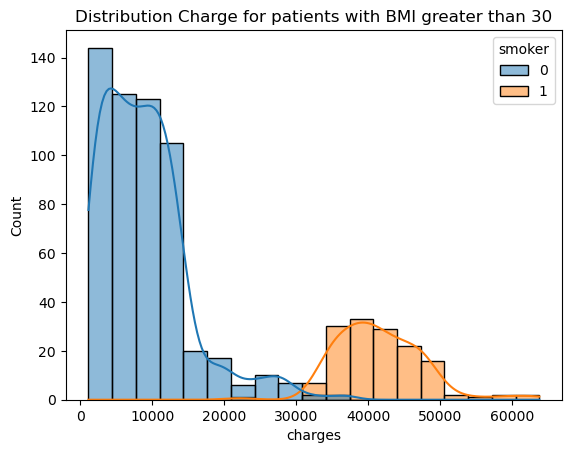

In [92]:
plt.title("Distribution Charge for patients with BMI greater than 30")
sns.histplot(data=df[df['bmi'] >= 30],x="charges",kde=True,hue="smoker")
plt.show()

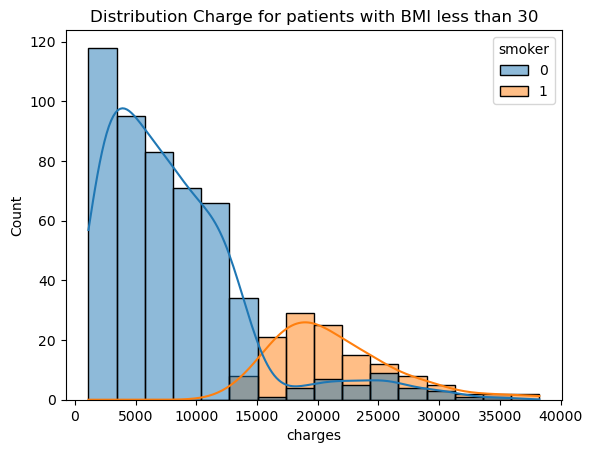

In [93]:
plt.title("Distribution Charge for patients with BMI less than 30")
sns.histplot(data=df[df['bmi'] < 30],x="charges",kde=True,hue="smoker")
plt.show()

It appears patients with BMI less than 30 spend less on medical charges compared to those with a higher BMI, let's exercise folks!. Also in some cases non smoking patient with bmi less than 30 seem to be spending less compared to non smokers with BMi greater than 30, maybe those non smokers have serious medical issues and these smokers do not have major issues.

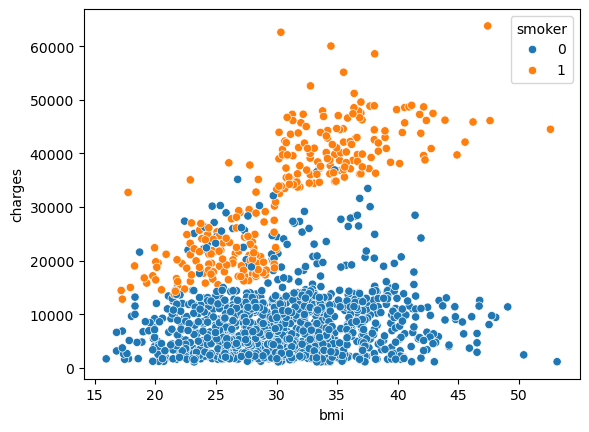

In [95]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')
plt.show()

The trend is still the same here, for non smokers an increase in BMI does not correspond to an increase in charges, even though there are a few outliers, maybe its those non smokers with major medical issues since its happening even for those with low BMI which is considered healthy. Its clear that for smokers an increase in BMI is related to an increase in medical expenses and there is a jump from 30.

#### Age

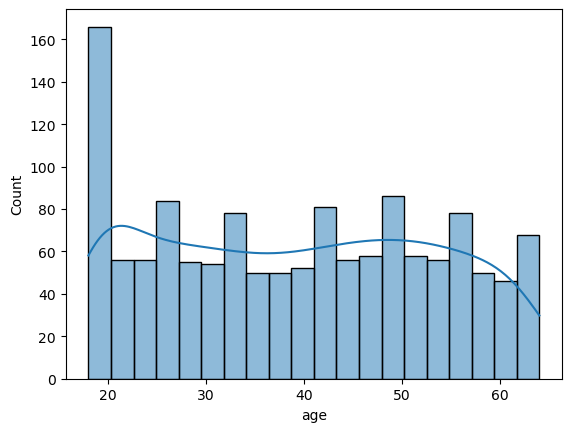

In [60]:
sns.histplot(data=df,x=df['age'],kde=True,bins=20)
plt.show()

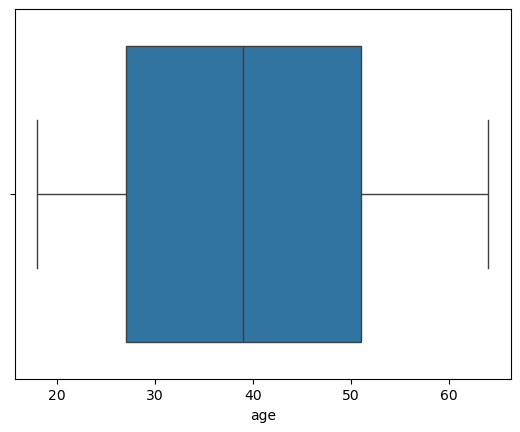

In [54]:
sns.boxplot(x=df['age'])
plt.show()

The age seem to follow a uniform distribution, with between 40- 60 customers in each age range, except for those below 20 years who have almost double as many customers as other ages

#### Children

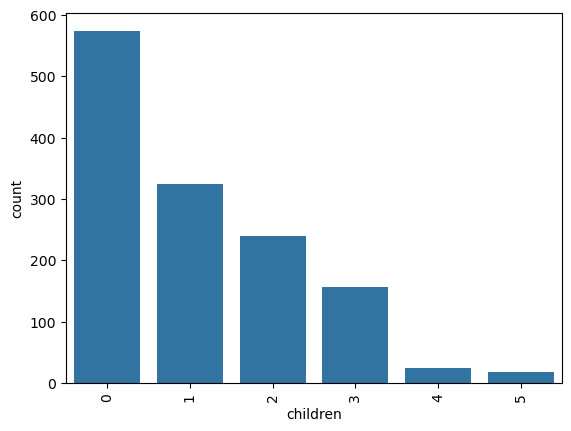

In [64]:
sns.countplot(x=df["children"])
plt.xticks(rotation=90)
plt.show()

Most people do not have kids which seems to be the trend in the developed world where people are not having kids, which explains the right skew

#### Smoker

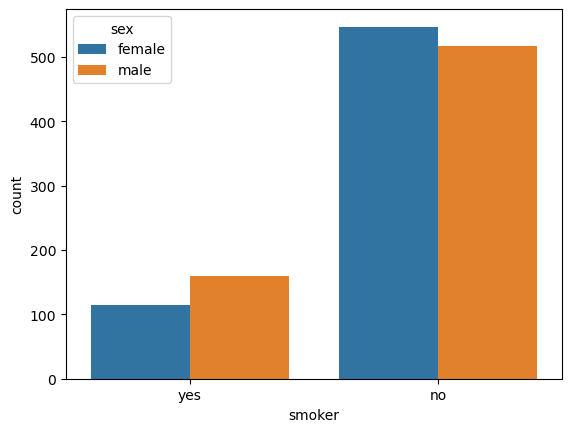

In [74]:
sns.countplot(data=df,x='smoker',hue="sex")
plt.show()

Most people in this dataset do not smoke and among those who smoke it appears male smokers are more

### Region

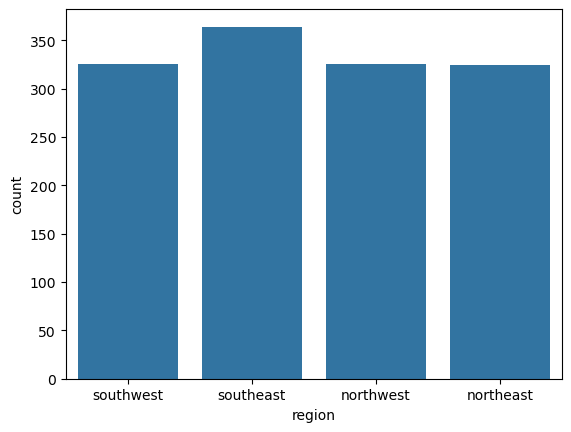

In [73]:
sns.countplot(data=df,x="region")
plt.show()

#### Charges

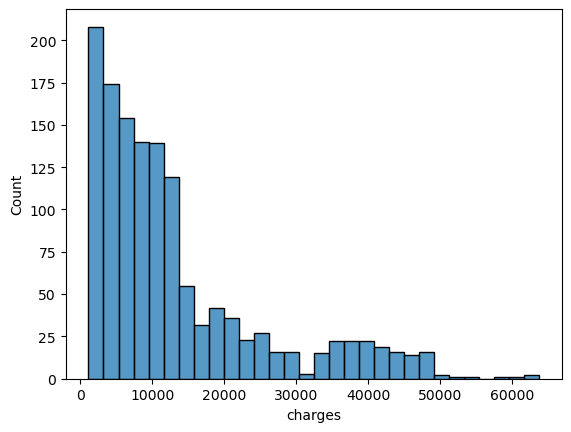

In [76]:
sns.histplot(df,x="charges")
plt.show()

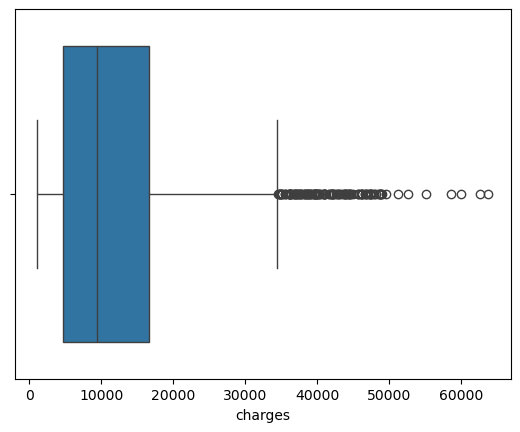

In [78]:
sns.boxplot(df,x="charges")
plt.show()

So far i can only see the that there is a right skweness on the charges and a lot of outliers implying there are inviduals who are paying more and anothers who are paying less. Would need to investigate this further

In [ ]:
## Step 4 Handling Data Issues